# Isogeometric Analysis using BEM (IGABEM)

## Curve representation.

There are three main ways a curve is represented mathematically: explicit, implicit and parametric. 

In [2]:
using PyPlot
plt = PyPlot
f(x) = sqrt.(1-x.^2);
x = 0:0.01:1;
plot(x,f(x),label="Explicit",marker="x")
xx(t) = cos.(t);
yy(t) = sin.(t);
t = 0:0.01:pi/2;
plot(xx(t),yy(t),label="Parametric",marker="<",markersize=3)
grid(1)
legend()
axis("equal")

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186


MethodError: MethodError: no method matching -(::Int64, ::Array{Float64,1})
Closest candidates are:
  -(!Matched::PyCall.PyObject, ::Any) at C:\Users\GDS2\.julia\packages\PyCall\0jMpb\src\pyoperators.jl:14
  -(::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) at int.jl:51
  -(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:52
  ...

In CAD, the preferred representation is the parametric. Many geometric shapes are represented by segment based curves such as Bézier and B-Spline patches. 

## Bézier curves

A Bézier curve may be obtained by multiple linear interpolations. This procedure is known as the De Casteljau's algorithm. 

Consider a group of points which will describe the curve. These points will not be contained in the curve with the exception of the first and last ones.

This points are called control points and the polygon formed by them is called the control polygon.

In [2]:
pwd()

'C:\\Users\\GDS2\\Dropbox\\Projeto CARAcous\\Compartilhamento_Girao_Alvaro\\Alvaro\\dev\\new_bem\\notebooks'

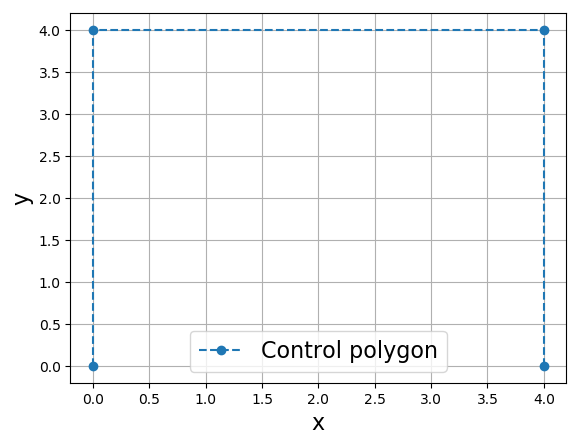

In [3]:
# The control points are created.
b1=[0. 0.]
b2=[0. 4.]
b3=[4. 4.]
b4=[4. 0.]
b0 = vcat(b1,b2,b3,b4)
degree=size(b0,1)-1
p = plot(b0[:,1],b0[:,2],linestyle="--",marker="o",label="Control polygon")
plt.grid("on")
plt.legend(loc="botton center",fancybox="true",fontsize="16.0") # Create a legend of all the existing plots using their labels as names
plt.xlabel("x",fontsize="16.0")
plt.ylabel("y",fontsize="16.0")
#savefig("../results/cp.pdf",transparent= true);

### De Casteljau's algorithm

The first procedure to evaluate the points in a Bézier curve given by a set of control points will be the de Casteljau's algorithm. This procedure consists of a series of linear interpolations of the control points, as will be shown below.

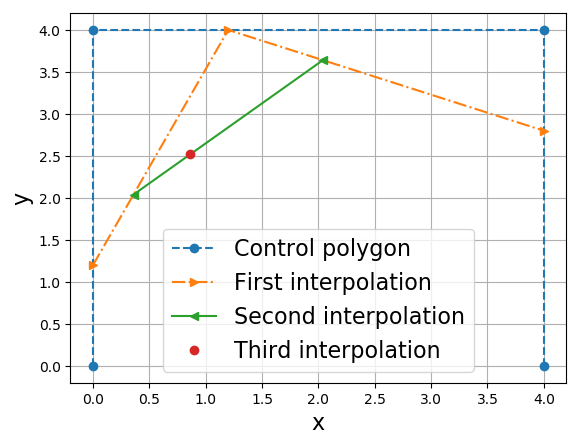

In [4]:
# First, the control points are still given by b0
# The parameter t is equal to any value between [0,1], let
t = 0.3;
# First, new points between the control points are created 
# There will be one less point then the original control points
b1 = zeros(size(b0,1)-1,2)
# The coordinates are the linear interpolation between the control points
for i = 1:size(b1,1)
    b1[i,1] = b0[i,1]*(1-t) + b0[i+1,1]*t;
    b1[i,2] = b0[i,2]*(1-t) + b0[i+1,2]*t;
end
# Now, the same process will be carried out for the new control points
# There will be one less point then the original control points
b2 = zeros(size(b1,1)-1,2)
# The coordinates are the linear interpolation between the control points
for i = 1:size(b2,1)
    b2[i,1] = b1[i,1]*(1-t) + b1[i+1,1]*t;
    b2[i,2] = b1[i,2]*(1-t) + b1[i+1,2]*t;
end
# Now, the same process will be carried out for the new control points
# There will be one less point then the original control points
b3 = zeros(size(b2,1)-1,2)
# The coordinates are the linear interpolation between the control points
for i = 1:size(b3,1)
    b3[i,1] = b2[i,1]*(1-t) + b2[i+1,1]*t;
    b3[i,2] = b2[i,2]*(1-t) + b2[i+1,2]*t;
end

# Finally, the points will be displayed. 
# The point on the curve is b3 
p4 = plot(b0[:,1],b0[:,2],linestyle="--",marker="o",label="Control polygon")
p1 = plot(b1[:,1],b1[:,2],linestyle="-.",marker=">",label="First interpolation")
p2 = plot(b2[:,1],b2[:,2],linestyle="-",marker="<",label="Second interpolation")
p3 = plot(b3[:,1],b3[:,2],linestyle="none",marker="o",label="Third interpolation")
plt.grid("on")
plt.xlabel("x",fontsize="16.0")
plt.ylabel("y",fontsize="16.0")
plt.legend(loc="botton center",fancybox="true",fontsize="16.0") # Create a legend of all the existing plots using their labels as names
#savefig("../results/interp.pdf",transparent = true);

The process shown above is known as the de Casteljau's algorithm. It's clear that the curve is built using only linear interpolation between the control points. The last point, which would correspond to the control points b3 is actually the point on the Bézier curve.

For each point on the curve, a number of points equal to the double of the degree of the curve plus one (2 degree +1) are evaluated, which corresponds to the points contained in b1 and b2.

This algorithm may be written as a single function which will return the last value for the curve of an arbitrary degree, defined by the number of control points. 

In [65]:
function decasteljau(b0,t)
#   uses  de Casteljau to compute one coordinate
#   value of a  Bezier curve. Has to be called
#   for each coordinate  (x,y, and/or z) of a control polygon.
#   Input:   degree: degree of curve.
#            coeff:  array with coefficients of curve.
#            t:      parameter value.
#    Output: coordinate value.
t1 = 1.0 - t
degree=size(b0,1)-1
b=zeros(degree+1,2)
b[:,:]=b0[:,:]
for j=1:degree
    for i=0:degree - j
        b[i+1,:]= t1* b[i+1,:]  +   t * b[i+2,:]
    end
end
return b[1,:]
end

decasteljau (generic function with 1 method)

Because the points which describe the geometry are not contained in the curve, this type of representation is known as isogeometric as opposed to an isoparametric representation in which the points used to describe the geometry are contained in the curve.

In [11]:
# The interpolation will be carried out on the parametric variable t 
npontos=20
t=range(0,stop=1,length=npontos)
C=zeros(npontos,2)
for i=1:npontos
    C[i,:]=decasteljau(b0,t[i])
end

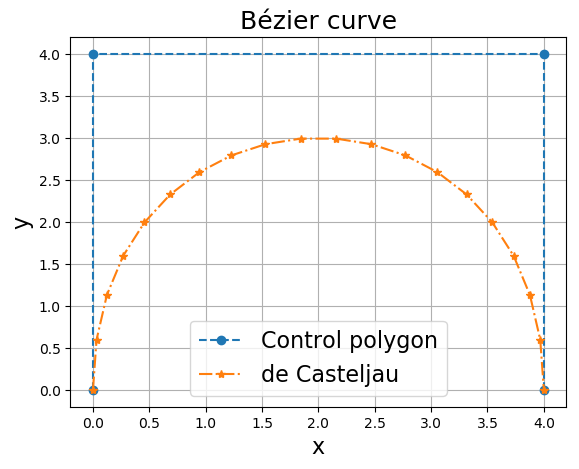

In [12]:
p2 = plot(b0[:,1],b0[:,2],linestyle="--",marker="o",label="Control polygon")
p1 = plot(C[:,1],C[:,2],linestyle="-.",marker="*",label="de Casteljau")
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Bézier curve",fontsize="18.0")
plt.grid("on")
plt.xlabel("x",fontsize="16.0")
plt.ylabel("y",fontsize="16.0")
plt.legend(loc="botton center",fancybox="true",fontsize="16.0") # Create a legend of all the existing plots using their labels as names
#savefig("../results/bezier_decasteljau.pdf",transparent = true);

### Bernstein's equation

Another way to produce this interpolation is to use the Bernstein equation. It is an equivalent way to obtain the Bézier curve and it is still recursive.

The Bernstein equation may be written as

\begin{equation}
    C(t) = \sum_{i=0}^{n} {B_{i}}^n b_i ,
\end{equation}
where $n$ is the degree of the curve, i.e., one less than the number of control points, $b_i$ is the i-th control point and ${B_{i}}^n$ is the Bernstein coefficient, given by

\begin{equation}
    {B_{i}}^n = \frac{n!}{i! (n-1)!} t^{n-i} (1-t)^i.
\end{equation}

The first term of the Bernstein coefficient may be obtained using Pascal's triangle. 

In [13]:
function pascal(row, column)
# Computes the values of an entry in the Pascal's triangle
if column == 0
    return 1
elseif row == 0
    return 0
else
    return pascal(row-1, column) + pascal(row-1, column-1)
end
end

function bernstein(b0,coef,t)
C=zeros(2)
degree=size(b0,1)-1
for j=0:degree
    C=C+b0[j+1,:]*coef[j+1]*t^j*(1-t)^(degree-j)
end
return C
end

bernstein (generic function with 1 method)

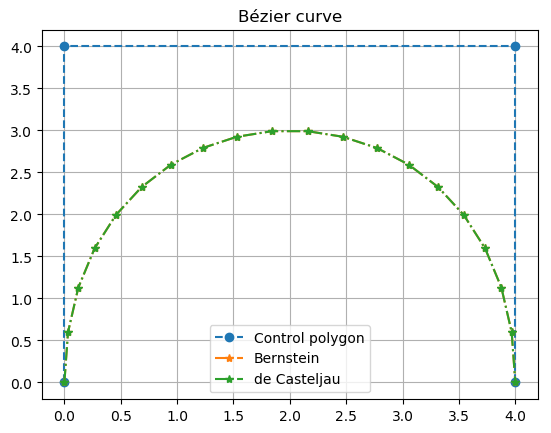

PyObject <matplotlib.legend.Legend object at 0x0000000034511908>

In [21]:
# Now, for the same control points b0,the Bernstein equation will
#be used to evaluate points on a Bézier curve.
# The control points are created.
b1=[0. 0.]
b2=[0. 4.]
b3=[4. 4.]
b4=[4. 0.]
b0 = vcat(b1,b2,b3,b4)
degree=size(b0,1)-1 # determine the degree of the curve
coef=zeros(degree+1) # determine the number of values from Pascal's triangle
for i = 0:degree # Evaluate the Pascal's triangle coefficients
    coef[i+1]=pascal(degree,i)
end

# The interpolation will be carried out on the parametric variable t 
npontos=20
t=range(0,stop=1,length=npontos)
C1=zeros(npontos,2)
for i=1:npontos
    C1[i,:]=bernstein(b0,coef,t[i])
end
p3 = plot(b0[:,1],b0[:,2],linestyle="--",marker="o",label="Control polygon")
p1 = plot(C1[:,1],C1[:,2],linestyle="-.",marker="*",label="Bernstein")
p2 = plot(C[:,1],C[:,2],linestyle="-.",marker="*",label="de Casteljau")
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Bézier curve")
plt.grid("on")
plt.legend(loc="botton center",fancybox="true") # Create a legend of all the existing plots using their labels as names

Both curves are equivalent, as expected. The Bernstein coefficients can be visualized as well.

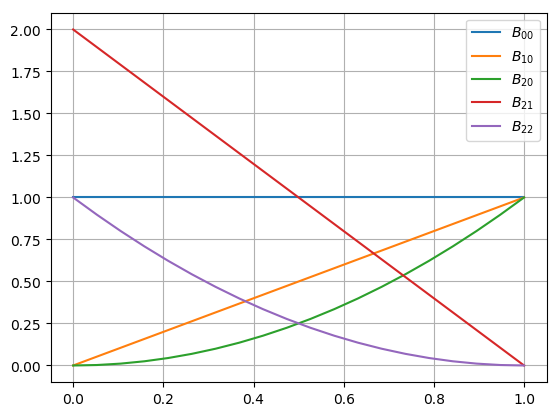

PyObject <matplotlib.legend.Legend object at 0x0000000026088B00>

In [43]:
t
one1 = ones(size(t,1))
B_00(t) = 1
B_10(t) = 1 * (t)
B_20(t) = 1 * (t.^2)
B_21(t) = 2 * (ones(size(t,1)) - t)
B_22(t) = 1 * (ones(size(t,1)) - t).^2

plot(t,ones(size(t,1)).*B_00(t),label=L"$B_{00}$")
plot(t,B_10(t),label=L"$B_{10}$")
plot(t,B_20(t),label=L"$B_{20}$")
plot(t,B_21(t),label=L"$B_{21}$")
plot(t,B_22(t),label=L"$B_{22}$")

plt.axis("tight") # Fit the axis tightly to the plot
plt.grid("on")
plt.legend(loc="botton center",fancybox="true") # Create a legend of all the existing plots using their labels as names

Some properties of Bézier curves are:

i) Consists of an interpolation between the control points on the extremities of the curve.

ii) A Bézier curve is always contained in the convex polygon of Hull of the control points.

The convex polygon of Hull it's the smallest convex set of lines which contains all of the control points. A popular analogy is to imagine an elastic string around all of the control points which is let loose and covers all of the points.

iii) A Bézier curve is always inside the bounding box of the control points, which is a rectangular shape whose lower left point is the minimum value of the x and y coordinate of all control points and its upper right point is the maximum value of the control points' coordinates. 


## Bézier curves' derivatives

The derivative of a Bézier curve is of great interest when performing isogeometric analysis with the boundary element method. It may be expressed using the Bernstein equation or the de Casteljau algorithm.

In [44]:
function derr_Bezier2(b0,t,r)
# Evaluates the derivative of order r of a Bézier curve using de Casteljau's algorithm
    t1 = 1.0 - t
    degree=size(b0,1)-1
    b=zeros(degree+1,2)
    coef=zeros(degree+1)
    fat=pascal(degree,r)*factorial(r)
    for i=0:r
        coef[i+1]=(-1)^(r-i)*pascal(r,i)
    end
    b[:,:]=b0[:,:]
    for j=1:degree-r
        for i=0:degree - j
            b[i+1,:]= t1* b[i+1,:]  +   t * b[i+2,:]
        end
    end
    drCdtr=zeros(2)
    for i=1:r + 1
        drCdtr=drCdtr+fat*coef[i]*b[i,:]
    end
return drCdtr
end

derr_Bezier2 (generic function with 1 method)

In [48]:
function derr_Bezier(b,t,r)
# Evaluates the derivative of order r of a Bézier curve using Bernstein's equation
    degree=size(b,1)-1
    drCdtr=zeros(2)
    fat=pascal(degree,r)*factorial(r)
    for i=0:degree-r
        coef=pascal(degree-r,i)
        B=coef*t^i*(1-t)^(degree-r-i)
        db=0
        for j=0:r
            cdelta=pascal(r,j)
            db=db+cdelta*(-1)^(r-j)*b[i+j+1,:]
        end
        drCdtr=drCdtr+fat*db*B
    end
    return drCdtr
end

derr_Bezier (generic function with 1 method)

In [66]:
b1=[0. 0.]
b2=[1. 1.]
b3=[0. 1.]
b4=[1. 0.]
npontos=20
t=range(0,stop=1,length=npontos)

b0=vcat(b1,b2,b3,b4)
degree=size(b0,1)-1
d3Cdt3=zeros(npontos,2)
d2Cdt2=zeros(npontos,2)
dCdt=zeros(npontos,2)
d3Cdt3b=zeros(npontos,2)
d2Cdt2b=zeros(npontos,2)
dCdtb=zeros(npontos,2)
C=zeros(npontos,2)

for i=1:npontos
    C[i,:]=decasteljau(b0,t[i])
#    dCdt[i,:]=derr_Bezier(b0,t[i],1) # Primeira derivada calculada usando Berstein
#    d2Cdt2[i,:]=derr_Bezier(b0,t[i],2) # Segunda derivada calculada usando Berstein
#    d3Cdt3[i,:]=derr_Bezier(b0,t[i],3) # Terceira derivada calculada usando Berstein
#    dCdtb[i,:]=derr_Bezier2(b0,t[i],1) # Primeira derivada calculada usando Decasteljau
#    d2Cdt2b[i,:]=derr_Bezier2(b0,t[i],2) # Segunda derivada calculada usando Decasteljau
#    d3Cdt3b[i,:]=derr_Bezier2(b0,t[i],3) # Terceira derivada calculada usando Decasteljau
end


In [57]:
b1=[0. 0.]
b2=[1. 1.]
b3=[0. 1.]
b4=[1. 0.]
npontos=20
t=range(0,stop=1,length=npontos)

b0=vcat(b1,b2,b3,b4)
degree=size(b0,1)-1
d3Cdt3=zeros(npontos,2)
d2Cdt2=zeros(npontos,2)
dCdt=zeros(npontos,2)
d3Cdt3b=zeros(npontos,2)
d2Cdt2b=zeros(npontos,2)
dCdtb=zeros(npontos,2)
C=zeros(npontos,2)
for i=1:npontos
    C[i,:]=decasteljau(b0,t[i])
    dCdt[i,:]=derr_Bezier(b0,t[i],1) # Primeira derivada calculada usando Berstein
    d2Cdt2[i,:]=derr_Bezier(b0,t[i],2) # Segunda derivada calculada usando Berstein
    d3Cdt3[i,:]=derr_Bezier(b0,t[i],3) # Terceira derivada calculada usando Berstein
    dCdtb[i,:]=derr_Bezier2(b0,t[i],1) # Primeira derivada calculada usando Decasteljau
    d2Cdt2b[i,:]=derr_Bezier2(b0,t[i],2) # Segunda derivada calculada usando Decasteljau
    d3Cdt3b[i,:]=derr_Bezier2(b0,t[i],3) # Terceira derivada calculada usando Decasteljau
end
p1 = plot(C[:,1],C[:,2],linestyle="-.",marker="x",label="Curva",color="blue")
p2 = plot(b0[:,1],b0[:,2],linestyle="--",marker="o",label="Polígono de Controle")
plt.quiver(C[:,1],C[:,2],dCdt[:,1],dCdt[:,2],color="red",width=0.002,scale=20,label="Vetores tangentes")
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Vetores tangente à curva")
plt.grid("on")
plt.legend(loc="lower center",fancybox="true") # Create a legend of all the existing plots using their labels as names
plt.axis("equal")

MethodError: MethodError: no method matching +(::Int64, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::PyCall.PyObject, ::Any) at C:\Users\GDS2\.julia\packages\PyCall\0jMpb\src\pyoperators.jl:14
  +(::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}, !Matched::T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:53
  ...

In [59]:
i=10
println("Primeira derivada: ")
println("Valor analítico (Berstein): $(dCdt[i,:])")
println("Valor analítico (Decasteljau): $(dCdtb[i,:])")
println("Valor numérico (diferenças finitas): $((C[i+1,:]-C[i,:])/(t[i+1]-t[i]))")
println("Segunda derivada: ")
println("Valor analítico (Berstein): $(d2Cdt2[i,:])")
println("Valor analítico (Decasteljau): $(d2Cdt2b[i,:])")
println("Valor numérico (diferenças finitas): $((dCdt[i+1,:]-dCdt[i,:])/(t[i+1]-t[i]))")
println("Terceira derivada: ")
println("Valor analítico (Berstein): $(d3Cdt3[i,:])")
println("Valor analítico (Decasteljau): $(d3Cdt3b[i,:])")
println("Valor numérico (diferenças finitas): $((d2Cdt2[i+1,:]-d2Cdt2[i,:])/(t[i+1]-t[i]))")

## Bézier curve splitting

It's possible to split a Bézier curve into as many patches as needed, at a arbitrary point in the parametric space $t$. 

In [60]:
function split(b0,t)
# Split a Bézier curve using de Casteljau's algorithm
t1 = 1.0 - t
degree=size(b0,1)-1
b=zeros(degree+1,2)
b1=zeros(degree+1,2)
b2=zeros(degree+1,2)
b[:,:]=b0[:,:]
b1[1,:]=b0[1,:]
b2[degree+1,:]=b0[degree+1,:]
for j=1:degree
    for i=0:degree - j
        b[i+1,:]= t1* b[i+1,:]  +   t * b[i+2,:]
    end
    b1[j+1,:]=b[1,:]
    b2[degree-j+1,:]=b[degree-j+1,:]
end
return b1,b2
end

LoadError: [91merror in method definition: function Base.split must be explicitly imported to be extended[39m

Primeira derivada: 
Valor analítico (Berstein): [0.00831025, 0.157895]
Valor analítico (Decasteljau): [0.00831025, 0.157895]
Valor numérico (diferenças finitas): [0.00277008, -4.21885e-15]
Segunda derivada: 
Valor analítico (Berstein): [-0.631579, -6.0]
Valor analítico (Decasteljau): [-0.631579, -6.0]
Valor numérico (diferenças finitas): [-2.10942e-15, -6.0]
Terceira derivada: 
Valor analítico (Berstein): [24.0, 0.0]
Valor analítico (Decasteljau): [24.0, 0.0]
Valor numérico (diferenças finitas): [24.0, 0.0]


In [61]:
npontos=20
b1=[0. 0.]
b2=[0. 4.]
b3=[4. 4.]
b4=[4. 0.]
npontos=20
t=linspace(0,1,npontos)
b0=vcat(b1,b2,b3,b4)
C=zeros(npontos,2)
C2=zeros(npontos,2)
b1,b2=split(b0,.5)
for i=1:npontos
    C[i,:]=decasteljau(b1,t[i])
    C2[i,:]=decasteljau(b2,t[i])
end

LoadError: [91mMethodError: no method matching split(::Array{Float64,2}, ::Float64)[0m
Closest candidates are:
  split([91m::T<:SubString[39m, ::Any; limit, keep) where T<:SubString at strings/util.jl:253
  split([91m::T<:AbstractString[39m, ::Any; limit, keep) where T<:AbstractString at strings/util.jl:277[39m

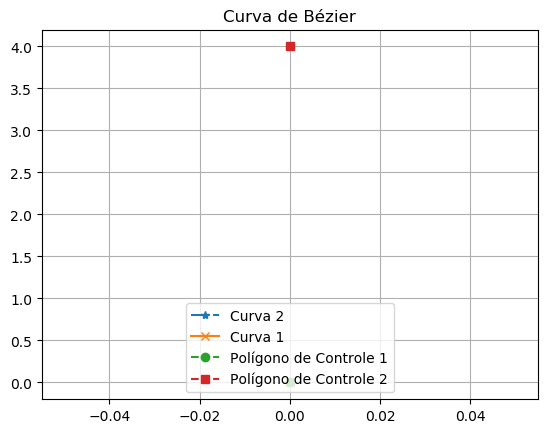

PyObject <matplotlib.legend.Legend object at 0x7fd3a9ef3350>

In [62]:
p2 = plot(C2[:,1],C2[:,2],linestyle="-.",marker="*",label="Curva 2")
p1 = plot(C[:,1],C[:,2],linestyle="-",marker="x",label="Curva 1")
p3 = plot(b1[:,1],b1[:,2],linestyle="--",marker="o",label="Polígono de Controle 1")
p4 = plot(b2[:,1],b2[:,2],linestyle="--",marker="s",label="Polígono de Controle 2")
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Curva de Bézier")
plt.grid("on")
plt.legend(loc="lower center",fancybox="true") # Create a legend of all the existing plots using their labels as names

## Bézier curve intersection

To access if two Bézier curves intersect one another, it's advantageous to analyse their bounding boxes. There are two possibilites:

i) The bounding boxes do not intersect.

In this case, the curves will not intersect, as they are bounded by their bounding boxes.

ii) The bounding boxes intersect.

In this case, the curves may or may not intersect. So, as long as there's intersection of the bounding boxes, the curves may be split and the bounding boxes of the resulting curves is compared. If the bounding boxes keep intersecting even when the original curve is split a reasonable amount of times, the curves may be said to intersect.

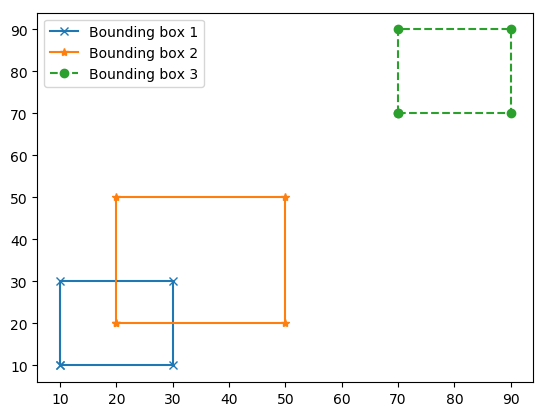

PyObject <matplotlib.legend.Legend object at 0x7fd3a9a33e50>

In [63]:
function bb2seg(bb)
    seg=zeros(5,2)
    seg[1,:]=[bb[1] bb[3]]
    seg[2,:]=[bb[2] bb[3]]
    seg[3,:]=[bb[2] bb[4]]
    seg[4,:]=[bb[1] bb[4]]
    seg[5,:]=[bb[1] bb[3]]
    return seg
end

# Intersecção de bounding box
# bounding box = [xmin,xmax,ymin,ymax]
bb1 = [10 30 10 30] # Bounding box 1
bb2 = [20 50 20 50] # Bounding box 2
bb3 = [70 90 70 90] # Bounding box 3
# Plota as bounding box
seg1=bb2seg(bb1) # Retorna o polígono que forma a bounding box 1
seg2=bb2seg(bb2)
seg3=bb2seg(bb3)
p1 = plot(seg1[:,1],seg1[:,2],linestyle="-",marker="x",label="Bounding box 1")
p1 = plot(seg2[:,1],seg2[:,2],linestyle="-",marker="*",label="Bounding box 2")
p3 = plot(seg3[:,1],seg3[:,2],linestyle="--",marker="o",label="Bounding box 3")
plt.legend(loc="upper left",fancybox="true") # Create a legend of all the existing plots using their labels as names

In [64]:
function bbInt(bb1,bb2)
    bb1left=bb1[1]
    bb1right=bb1[2]
    bb1bottom=bb1[3]
    bb1top=bb1[4]
    bb2left=bb2[1]
    bb2right=bb2[2]
    bb2bottom=bb2[3]
    bb2top=bb2[4]
    intersec= !(bb2left > bb1right
        || bb2right < bb1left
        || bb2top < bb1bottom
        || bb2bottom > bb1top)
    return intersec
end
# Verifica se 2 bounding box se interceptam
println(bbInt(bb1, bb3))
println(bbInt(bb1, bb2))
println(bbInt(bb2, bb3))

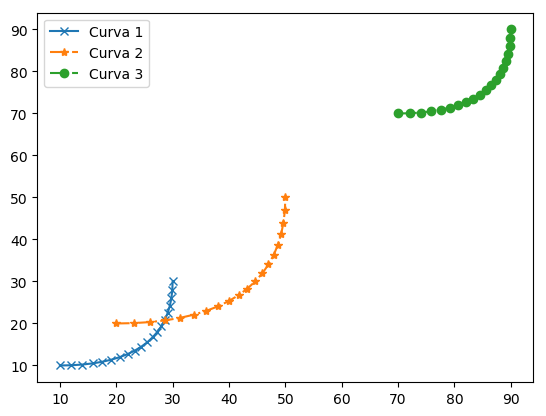

PyObject <matplotlib.legend.Legend object at 0x7fd3a9eae1d0>

false
true
false


In [65]:
# Intersecção de duas curvas de Bézier
b1=seg1[1:3,:]
b2=seg2[1:3,:]
b3=seg3[1:3,:]
C1=zeros(npontos,2)
C2=zeros(npontos,2)
C3=zeros(npontos,2)
for i=1:npontos
    C1[i,:]=decasteljau(b1,t[i])
    C2[i,:]=decasteljau(b2,t[i])
    C3[i,:]=decasteljau(b3,t[i])
end
p1 = plot(C1[:,1],C1[:,2],linestyle="-",marker="x",label="Curva 1")
p2 = plot(C2[:,1],C2[:,2],linestyle="-.",marker="*",label="Curva 2")
p3 = plot(C3[:,1],C3[:,2],linestyle="-.",marker="o",label="Curva 3")
plt.legend(loc="upper left",fancybox="true") # Create a legend of all the existing plots using their labels as names

In [66]:
function bezInt(b1, b2)
    threshold=1e-4
    if(bbInt(bbox(b1),bbox(b2)))
        if(areabbox(bbox(b1)) + areabbox(bbox(b2)) < threshold)
            return true
        else
            b1a,b1b=split(b1,.5)
            b2a,b2b=split(b2,.5)
            return (bezInt(b1a, b2a) || bezInt(b1a, b2b) || bezInt(b1b, b2a) || bezInt(b1b, b2b))
        end 
    else
        return false
    end
end

function bbox(b)
    degree=size(b,1)-1
    xmax=maximum(b[:,1])
    xmin=minimum(b[:,1])
    ymax=maximum(b[:,2])
    ymin=minimum(b[:,2])
    bb=[xmin,xmax,ymin,ymax];
    return bb
end

function areabbox(bb)
    area=(bb[2]-bb[1])*(bb[4]-bb[3])
    return area
end
# Verifica a intersecção de duas curvas de Bézier
println(bezInt(b1, b2))
println(bezInt(b2, b3))
println(bezInt(b1, b3))

LoadError: [91mMethodError: no method matching split(::Array{Float64,2}, ::Float64)[0m
Closest candidates are:
  split([91m::T<:SubString[39m, ::Any; limit, keep) where T<:SubString at strings/util.jl:253
  split([91m::T<:AbstractString[39m, ::Any; limit, keep) where T<:AbstractString at strings/util.jl:277[39m